Import necessary packages

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Load and preprocess image

In [48]:
image = cv2.imread("water_body_2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
pixel_values = gray_image.reshape((-1, 1))  # Reshape for clustering

Normalise pixel values

In [49]:
pixel_values = pixel_values.astype(np.float32) / 255.0

K-means Clustering

Optimal Clusters

In [50]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    wcss.append(kmeans.inertia_)

Plot Elbow Graph

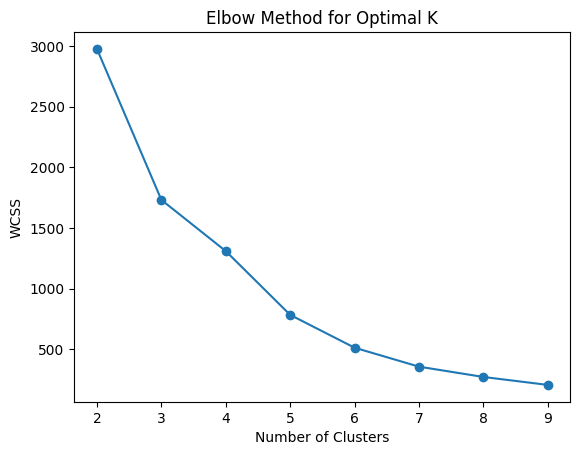

In [51]:
plt.plot(range(2, 10), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [61]:
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(pixel_values)

Reshape data back into image

In [62]:
segmented_image = clusters.reshape(gray_image.shape)

Compare original image and clustered image

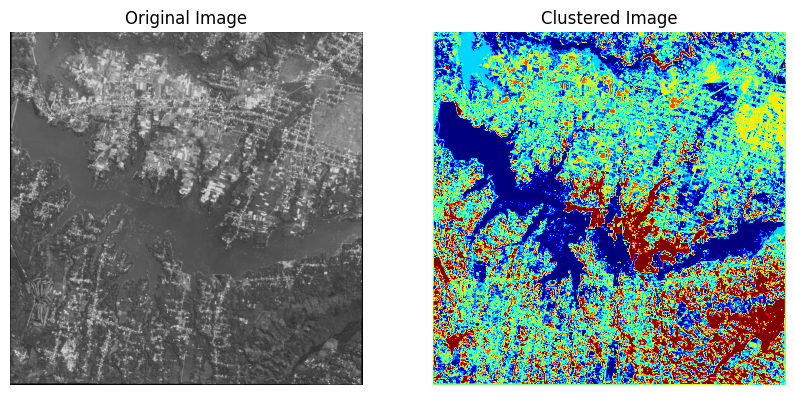

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap="jet")
plt.title("Clustered Image")
plt.axis("off")
plt.show()